In [2]:
path_rsimg = 'data/Section-6/s2_kunming_chenggong_6bands_20m.tif'
path_vec = 'data/Section-6/subset.gpkg'


In [10]:
import rasterio as rio
import geopandas as gpd
rsimg_rio = rio.open(path_rsimg)
print(rsimg_rio.meta)
vec_gdp = gpd.read_file(path_vec)
vec_gdp_utm = vec_gdp.to_crs(32648)
vec_gdp_utm

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1497, 'height': 1611, 'count': 6, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(20.0, 0.0, 268180.0,
       0.0, -20.0, 2765440.0)}


,geometry
0,"POLYGON ((277810.287 2748135.870, 282192.515 2..."


(6, 186, 247)

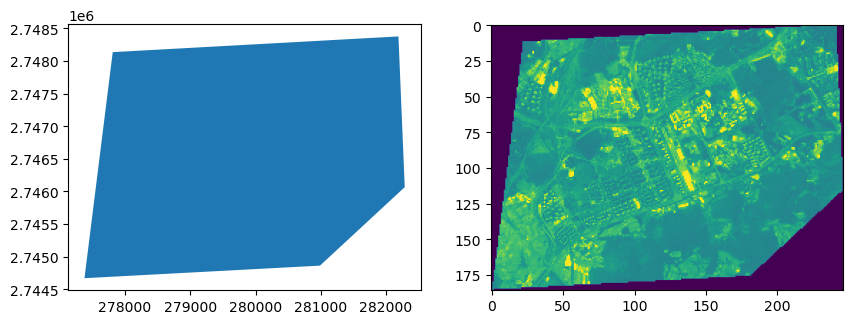

In [17]:
from rasterio import mask
import matplotlib.pyplot as plt
rsimg_sub, rsimg_sub_trans = mask.mask(rsimg_rio, vec_gdp_utm.geometry, crop=True, nodata=0)
fig, ax = plt.subplots(1,2,figsize=(10,5))
vec_gdp_utm.plot(ax=ax[0])
ax[1].imshow(rsimg_sub[0], vmin=0, vmax=3000)


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1497,
 'height': 1611,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 268180.0,
        0.0, -20.0, 2765440.0)}

In [21]:
path_subset = 'data/Section-6/s2_kunming_chenggong_6bands_20m_subs22.tif'
out_meta = rsimg_rio.meta
out_meta.update({
    'driver': 'GTiff',
    'height': rsimg_sub.shape[1],
    'width': rsimg_sub.shape[2],
    'transform': rsimg_sub_trans})

with rio.open(path_subset, 'w', **out_meta) as dset:
    dset.write(rsimg_sub)



In [23]:
path_subset1 = 'data/Section-6/s2_kunming_chenggong_6bands_20m_subs.tif'
path_subset2 = 'data/Section-6/s2_kunming_chenggong_6bands_20m_subs2.tif'



In [ ]:
subs1_rio = rio.open(path_subset1)
subs2_rio = rio.open(path_subset2)


In [27]:
subs2_rio.meta


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 282,
 'height': 234,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 274580.0,
        0.0, -20.0, 2745880.0)}

In [33]:
from rasterio.merge import merge
mosaic, out_trans = merge([subs1_rio, subs2_rio])


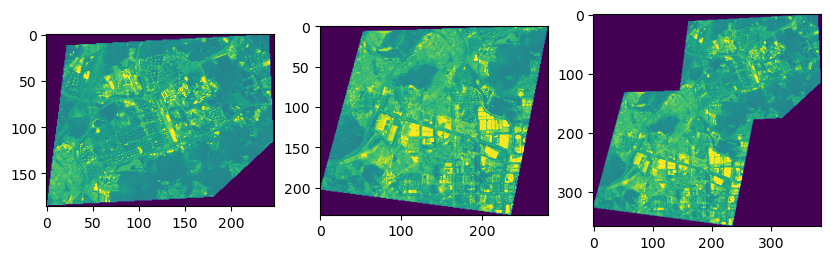

In [34]:
fig, ax = plt.subplots(1,3,figsize=(10,4))
ax[0].imshow(subs1_rio.read(1), vmin=0, vmax=3000)
ax[1].imshow(subs2_rio.read(1), vmin=0, vmax=3000)
ax[2].imshow(mosaic[0], vmin=0, vmax=3000)

